# What Has Been Done in This Study?
  1. **Data Engineering**: deal with duplicated items, useless features, value normalize, null value and illeagle value
  2. **Explore Data Analysis(EDA)**: understand the dataset and part of data interpretability.
  3. **Models Selection**: (i) Logistic Regression (ii) Decision Tree (iii) Random Forest

# Introductoin
## Background
Patients make appointments at clinics or hospitals to be checked by a doctor. Some of the patients do not show up for their appointments. This results in loss of valuable resources in terms of physician time and staffing allocation which could have been used more productively.

## The goal
The primary goal of this research is to find the suitable michine learning mode for predicting patient showing or not on the appointed date. Finally, apply it to improve medical resource utilization.

## The data
The original datasets from Kaggle (datasets: https://www.kaggle.com/datasets/joniarroba/noshowappointments/data).

  **01 - PatientId**: Identification of a patient

  **02 - AppointmentID**: Identification of each appointment

  **03 - Gender**: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

  **04 - DataMarcacaoConsulta**: The day of the actuall appointment, when they have to visit the doctor.

  **05 - DataAgendamento**: The day someone called or registered the appointment, this is before appointment of course.

  **06 - Age**: How old is the patient.

  **07 - Neighbourhood** : Where the appointment takes place.

  **08 - Scholarship**: True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

  **09 - Hipertension**:   True or False

  **10 - Diabetes**:   True or False

  **11 - Alcoholism**:   True or False

  **12 - Handcap**:   True or False

  **13 - SMS_received**:   1 or more messages sent to the patient.

  **14 - No-show**: True(not showing) or False(showing).


## Prediction task
The goal in this dataset is to predict patient showing or not on the appointed date.


## Key Findings

**1. Model Findings**

Logistic Regression has the highest accuracy (80%), and Decision Tree has the lowest accuracy (73%). Combing other metrics, Logistic Regression has the best performace comparing Decision Tree and Random Forest.

**2. Correlationship Findings**

* Age has great relationship with Hipertension and Diabetes.
* Hipertension and Diabetes has close correlationship.
* No-showing has great correlationship with SMS_received and Scholarship.
* Showing has great correlationship with age.
* Number of showing patients from specific neighbourhood affected by receving SMS and ages.
* Number of showing patients without reciving sms is greater than showing patients with reciving sms, which mean that sending sms reminding is working.
* No clear correlation between showing and gender, chronic diseases.


In [224]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [225]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.metrics import make_scorer

from mpl_toolkits.axes_grid1 import make_axes_locatable

from warnings import filterwarnings
filterwarnings('ignore')

label_encoder = LabelEncoder() # Initialize LabelEncoder

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [227]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt


# 1. Import Dataset

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
df = pd.read_csv("/content/drive/MyDrive/CSS581/datasets/KaggleV2-May-2016.csv")

In [259]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# 2. Change the Confused Feature Name

In [261]:
# Rename 'No-show' to 'showing_status'
df.rename(columns={'No-show': 'Show_status'}, inplace=True)

# Confirm the change
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Show_status'],
      dtype='object')


# 3. Dropping the duplicate rows
The duplicated item is defined as those with same PatientId and AppointmentID

In [265]:
df.shape

(110527, 14)

In [266]:
# Assuming your DataFrame is named 'df'
# Step 1: Check for duplicates based on PatientId and AppointmentID
duplicate_patients = df[df.duplicated(subset=['PatientId', 'AppointmentID'], keep=False)]

# Step 2: Count the number of unique duplicated PatientIds and AppointmentIDs
num_duplicates = duplicate_patients[['PatientId', 'AppointmentID']].drop_duplicates().shape[0]  # Count unique combinations
total_duplicates = duplicate_patients.shape[0]  # Count total duplicate entries

# Display the results
print(f"Number of unique duplicated PatientId and AppointmentID combinations: {num_duplicates}")
print(f"Total number of duplicate entries: {total_duplicates}\n")

# Step 3: Display the duplicated records
print("Duplicated Patient Records:")
print(duplicate_patients)



Number of unique duplicated PatientId and AppointmentID combinations: 0
Total number of duplicate entries: 0

Duplicated Patient Records:
Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, Show_status]
Index: []


In [291]:
df.shape

(110527, 10)

# 4. Encoding non-number Features

In [263]:
# Optional: if you want to check the data types after conversion
print(df.dtypes)

PatientId         float64
AppointmentID       int64
Gender              int64
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood       int64
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
Show_status         int64
dtype: object


In [262]:
# 2. Encode categorical columns
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Gender', 'Neighbourhood']

# showing_status: Map values to 1 and 0
df['Show_status'] = df['Show_status'].map({'No': 1, 'Yes': 0})

# Encoding each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

    # Construct the reverse mapping for Neighbourhood
    if col == 'Neighbourhood':
        neighbourhood_map = {index: label for index, label in enumerate(label_encoder.classes_)}

# Print the reverse mapping for Neighbourhood
print(neighbourhood_map)


{0: 'AEROPORTO', 1: 'ANDORINHAS', 2: 'ANTÔNIO HONÓRIO', 3: 'ARIOVALDO FAVALESSA', 4: 'BARRO VERMELHO', 5: 'BELA VISTA', 6: 'BENTO FERREIRA', 7: 'BOA VISTA', 8: 'BONFIM', 9: 'CARATOÍRA', 10: 'CENTRO', 11: 'COMDUSA', 12: 'CONQUISTA', 13: 'CONSOLAÇÃO', 14: 'CRUZAMENTO', 15: 'DA PENHA', 16: 'DE LOURDES', 17: 'DO CABRAL', 18: 'DO MOSCOSO', 19: 'DO QUADRO', 20: 'ENSEADA DO SUÁ', 21: 'ESTRELINHA', 22: 'FONTE GRANDE', 23: 'FORTE SÃO JOÃO', 24: 'FRADINHOS', 25: 'GOIABEIRAS', 26: 'GRANDE VITÓRIA', 27: 'GURIGICA', 28: 'HORTO', 29: 'ILHA DAS CAIEIRAS', 30: 'ILHA DE SANTA MARIA', 31: 'ILHA DO BOI', 32: 'ILHA DO FRADE', 33: 'ILHA DO PRÍNCIPE', 34: 'ILHAS OCEÂNICAS DE TRINDADE', 35: 'INHANGUETÁ', 36: 'ITARARÉ', 37: 'JABOUR', 38: 'JARDIM CAMBURI', 39: 'JARDIM DA PENHA', 40: 'JESUS DE NAZARETH', 41: 'JOANA D´ARC', 42: 'JUCUTUQUARA', 43: 'MARIA ORTIZ', 44: 'MARUÍPE', 45: 'MATA DA PRAIA', 46: 'MONTE BELO', 47: 'MORADA DE CAMBURI', 48: 'MÁRIO CYPRESTE', 49: 'NAZARETH', 50: 'NOVA PALESTINA', 51: 'PARQUE IN

In [267]:
df.shape

(110527, 14)

# Drop Useless Features (PatientId, AppointmentID, ScheduledDay, AppointmentDay)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  int64  
 3   ScheduledDay    110527 non-null  int64  
 4   AppointmentDay  110527 non-null  int64  
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  int64  
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  Show_status     110527 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 11.8 MB


In [273]:
# Dropping the specified columns: Datasets is comming from the similar big area, so the  Neighbourhood is not related to the showing status
df = df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1)

# Display the updated DataFrame
print(df.info())  # This will show the DataFrame structure after dropping the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Gender         110527 non-null  int64
 1   Age            110527 non-null  int64
 2   Neighbourhood  110527 non-null  int64
 3   Scholarship    110527 non-null  int64
 4   Hipertension   110527 non-null  int64
 5   Diabetes       110527 non-null  int64
 6   Alcoholism     110527 non-null  int64
 7   Handcap        110527 non-null  int64
 8   SMS_received   110527 non-null  int64
 9   Show_status    110527 non-null  int64
dtypes: int64(10)
memory usage: 8.4 MB
None


# Clean Data (Null or illeagal)

## Dealing with Null Data

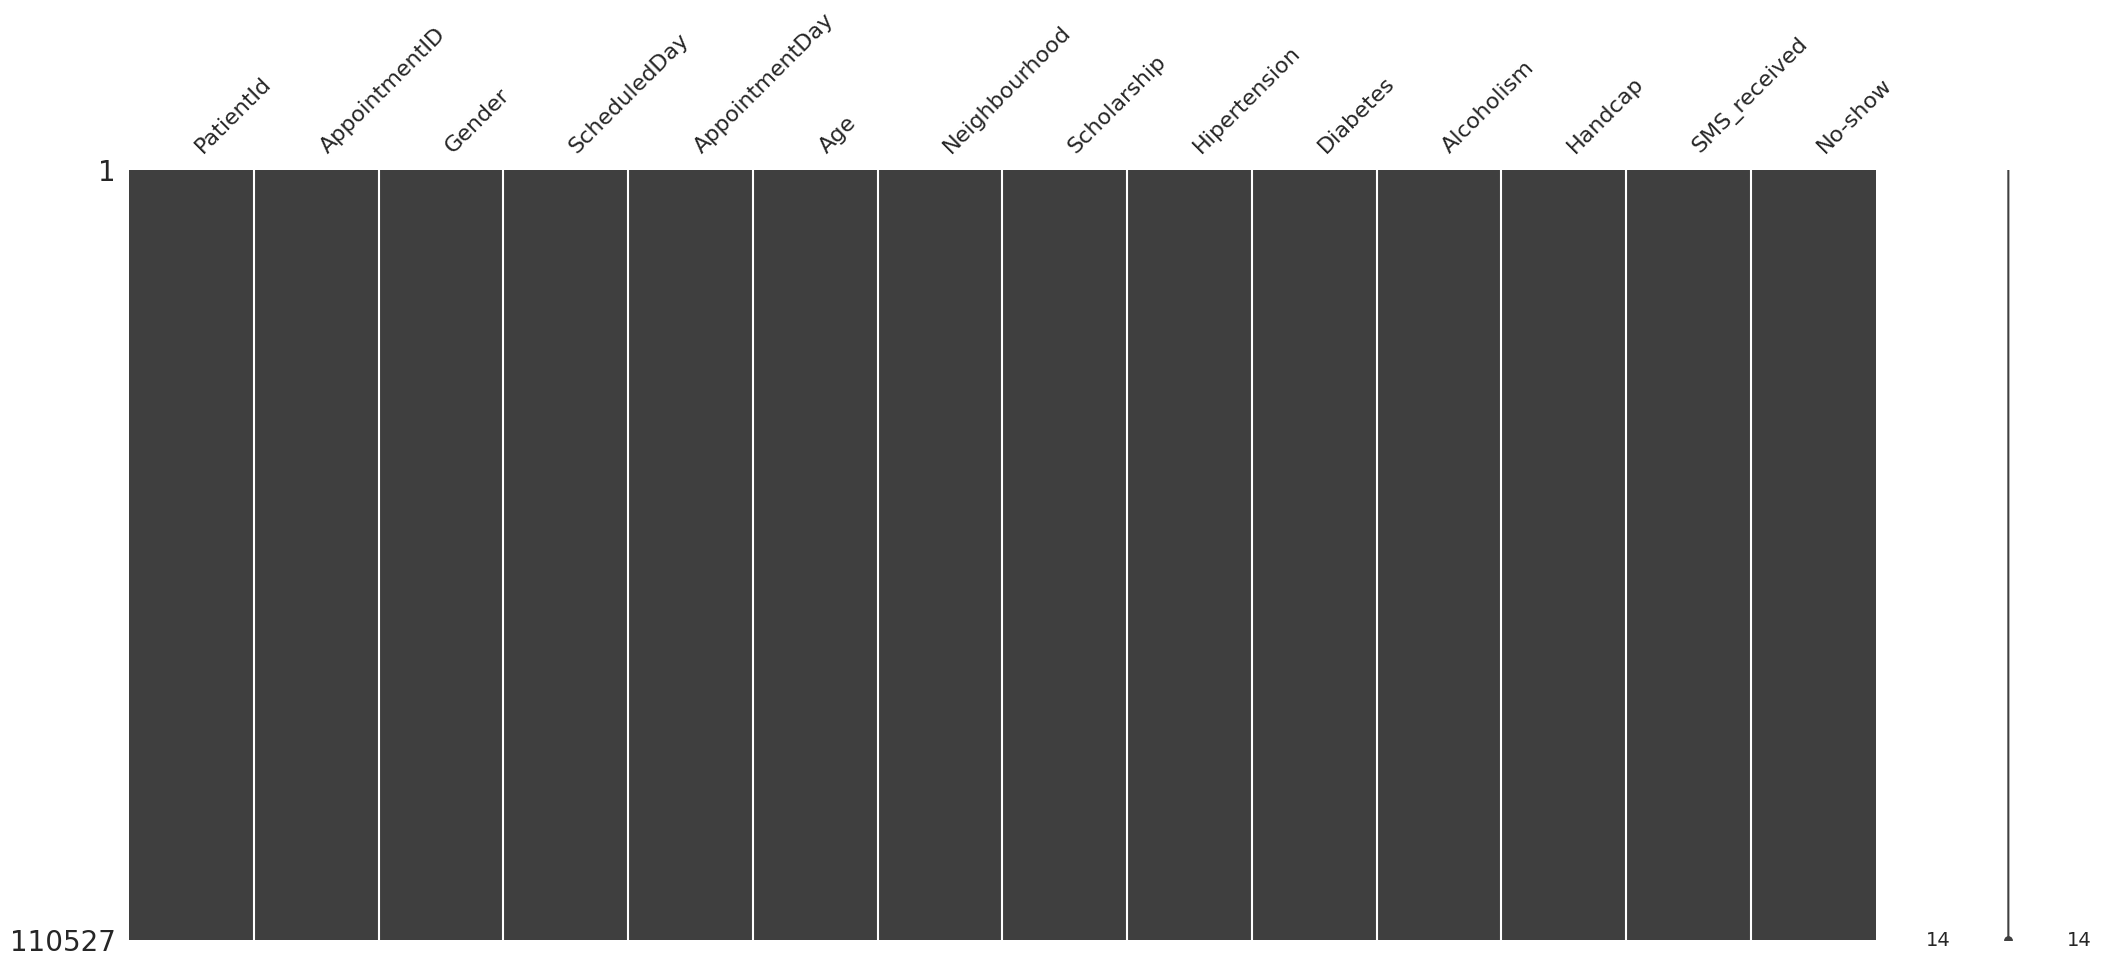

In [101]:
msno.matrix(df);

In [268]:
# Check for null values
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])  # Show only columns with null values


Series([], dtype: int64)


## Deal with Illeagal Values

In [269]:
# Check for invalid ages (e.g., negative ages)
invalid_ages = df[(df['Age'] < 0) | (df['Age'] > 120)]
print(invalid_ages)


          PatientId  AppointmentID  Gender          ScheduledDay  \
99832  4.659432e+14        5775010       0  2016-06-06T08:58:13Z   

             AppointmentDay  Age  Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1             60            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received  Show_status  
99832         0           0        0             0            1  


In [270]:
# Delete the entry with AppointmentID 99832
df = df[df['AppointmentID'] != 99832]

In [271]:
# Check if succefully delete the 99832 (e.g., negative ages)
deleted_row_check = df[df['AppointmentID'] == 99832]
if deleted_row_check.empty:
    print("The row with AppointmentID 99832 has been successfully deleted.")
else:
  print(deleted_row_check)

The row with AppointmentID 99832 has been successfully deleted.


In [272]:
#Gender: Check for invalid gender entries
valid_genders = [0, 1]
invalid_genders = df[~df['Gender'].isin(valid_genders)]
if deleted_row_check.empty:
    print("All the gender information is valid.")
else:
    print(deleted_row_check)


All the gender information is valid.


# EDA

In [274]:
show = df['Show_status'] == 1
noshow = df['Show_status'] == 0

In [275]:
df[show].count()

,0
Gender,88208
Age,88208
Neighbourhood,88208
Scholarship,88208
Hipertension,88208
Diabetes,88208
Alcoholism,88208
Handcap,88208
SMS_received,88208
Show_status,88208


In [276]:
df[noshow].count()

,0
Gender,22319
Age,22319
Neighbourhood,22319
Scholarship,22319
Hipertension,22319
Diabetes,22319
Alcoholism,22319
Handcap,22319
SMS_received,22319
Show_status,22319


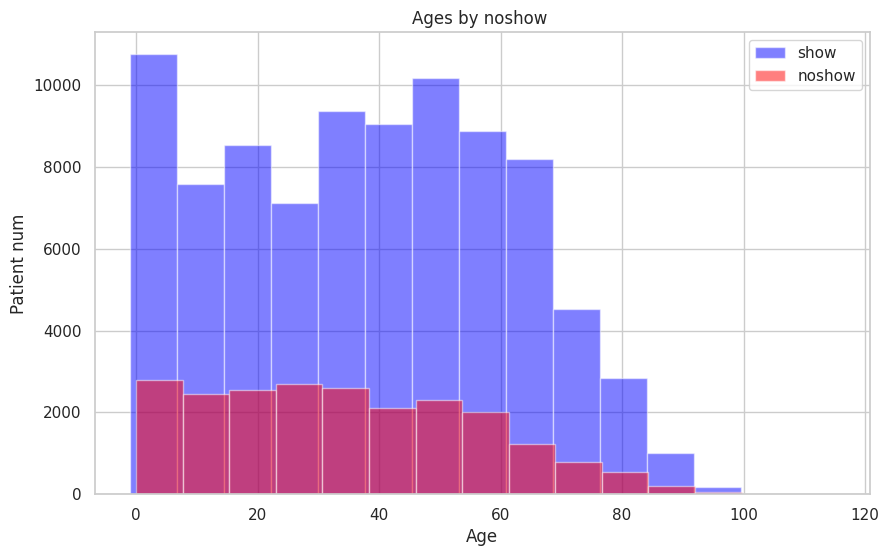

In [277]:
# age affect noshow status
plt.figure(figsize=(10, 6))
plt.hist(df[show]['Age'], bins=15, color='blue', alpha=0.5, label='show')
plt.hist(df[noshow]['Age'], bins=15, color='red', alpha=0.5, label='noshow')

plt.title('Ages by noshow ')
plt.xlabel('Age')
plt.ylabel('Patient num')
plt.legend()
plt.show()

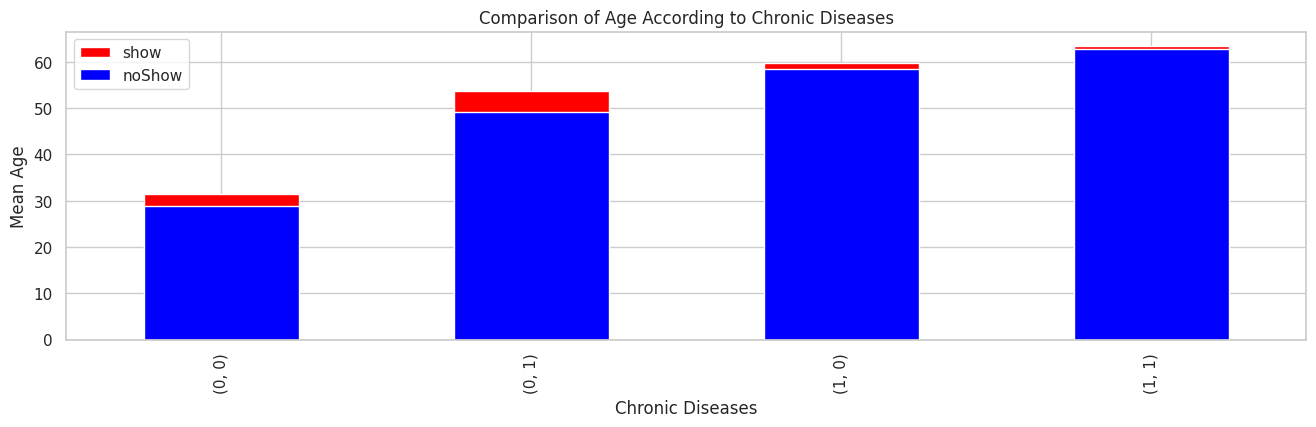

In [278]:
# Assuming show and noshow are already defined as per your previous messages
plt.figure(figsize=(16, 4))

# Calculate and plot mean age for patients who showed up
df[show].groupby(['Hipertension', 'Diabetes'])['Age'].mean().plot(kind='bar', color='red', label='show')

# Calculate and plot mean age for patients who did not show up
df[noshow].groupby(['Hipertension', 'Diabetes'])['Age'].mean().plot(kind='bar', color='blue', label='noShow')

plt.title('Comparison of Age According to Chronic Diseases')
plt.xlabel('Chronic Diseases')
plt.ylabel('Mean Age')
plt.legend()
plt.show()  # Make sure to include parentheses here

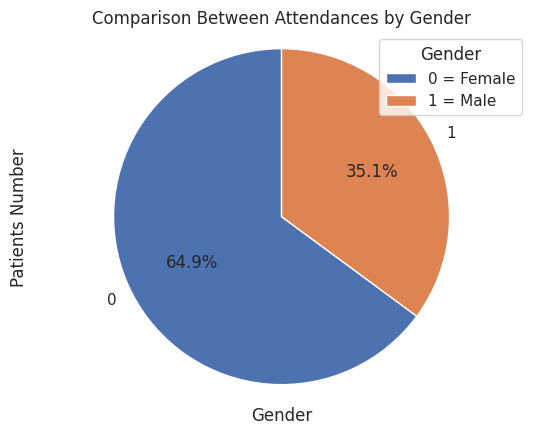

In [292]:
# Calculate the normalized value counts for gender of patients who showed up
df['Gender'][show].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Comparison Between Attendances by Gender')
plt.xlabel('Gender')  # Note: xlabel may not show on a pie chart
plt.ylabel('Patients Number')  # Note: ylabel may not show on a pie chart

# Create custom legend labels
gender_labels = ['0 = Female', '1 = Male']

# Add a custom legend with the specified labels
plt.legend(labels=gender_labels, title='Gender', loc='upper right')

plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()  # Make sure to include parentheses here

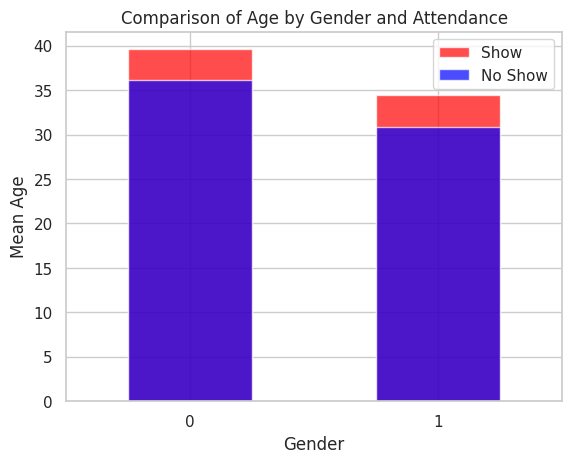

In [280]:
# Group by Gender and calculate the mean Age for those who showed and those who didn't
df[show].groupby('Gender')['Age'].mean().plot(kind='bar', color='red', label='Show', alpha=0.7)
df[noshow].groupby('Gender')['Age'].mean().plot(kind='bar', color='blue', label='No Show', alpha=0.7)

plt.title('Comparison of Age by Gender and Attendance')
plt.xlabel('Gender')
plt.ylabel('Mean Age')
plt.legend()
plt.xticks(rotation=0)  # Optional: Rotates x-axis labels for better visibility
plt.show()  # Ensure to include parentheses

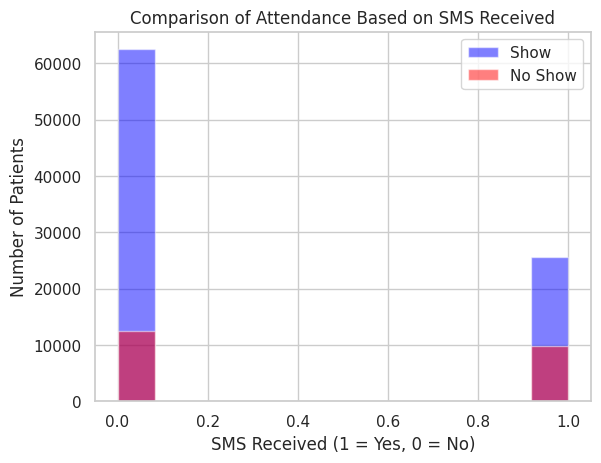

In [281]:
# Create a histogram to compare SMS received between patients who showed and those who didn't
df['SMS_received'][show].hist(alpha=0.5, bins=12, color='blue', label='Show')
df['SMS_received'][noshow].hist(alpha=0.5, bins=12, color='red', label='No Show')

plt.title('Comparison of Attendance Based on SMS Received')
plt.xlabel('SMS Received (1 = Yes, 0 = No)')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()  # Ensure to include parentheses

In [282]:
df1 = df.copy()

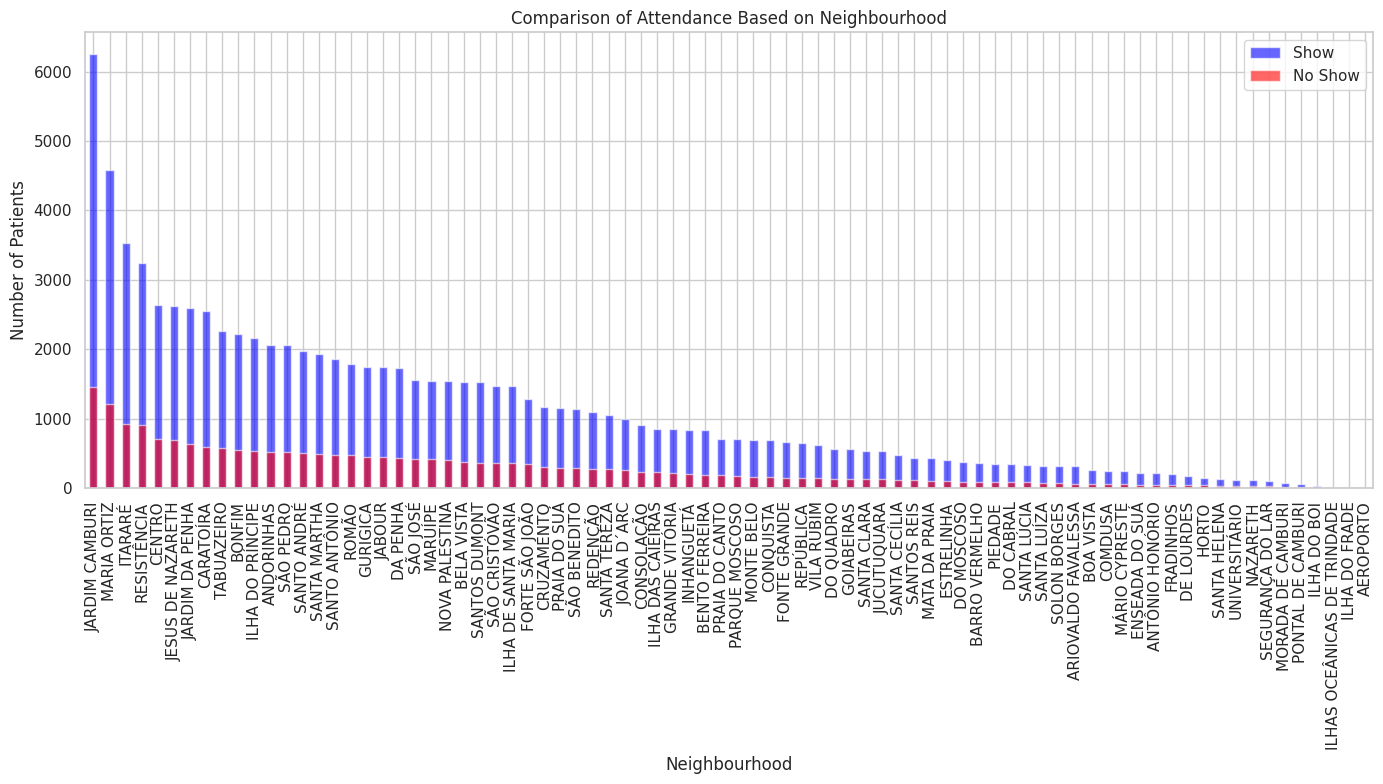

In [283]:
# Assuming 'Neighbourhood' has been converted to numbers, map it back to original names
df1['Neighbourhood'] = df1['Neighbourhood'].replace(neighbourhood_map)

# Now you can plot using the original neighborhood names
plt.figure(figsize=(14, 8))
df1['Neighbourhood'][show].value_counts().plot(kind='bar', color='blue', alpha=0.6, label='Show')
df1['Neighbourhood'][noshow].value_counts().plot(kind='bar', color='red', alpha=0.6, label='No Show')

plt.title('Comparison of Attendance Based on Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


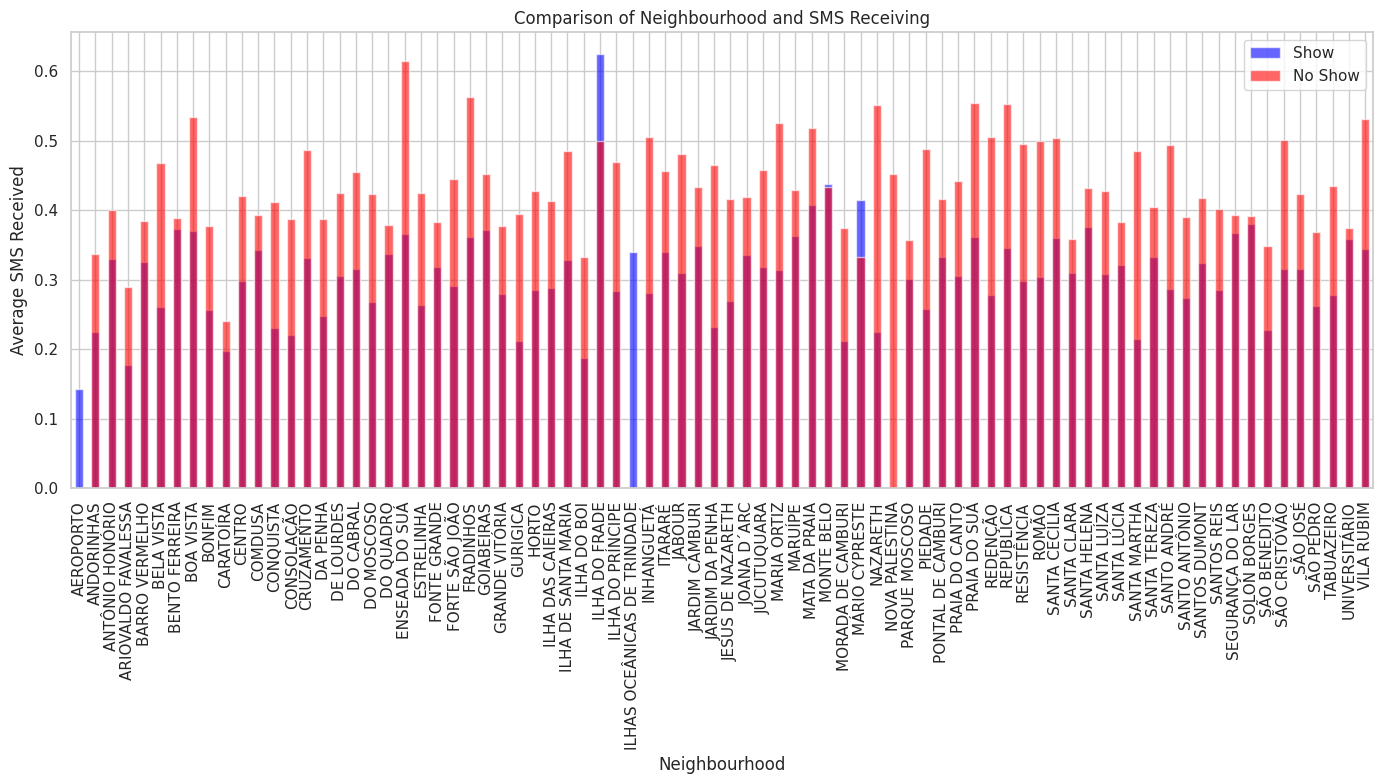

In [284]:

# Plot the comparison between neighbourhoods and SMS_received
plt.figure(figsize=(14,8))
df1[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color='blue', alpha=0.6, label='Show')
df1[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color='red', alpha=0.6, label='No Show')

plt.title('Comparison of Neighbourhood and SMS Receiving')
plt.xlabel('Neighbourhood')
plt.ylabel('Average SMS Received')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

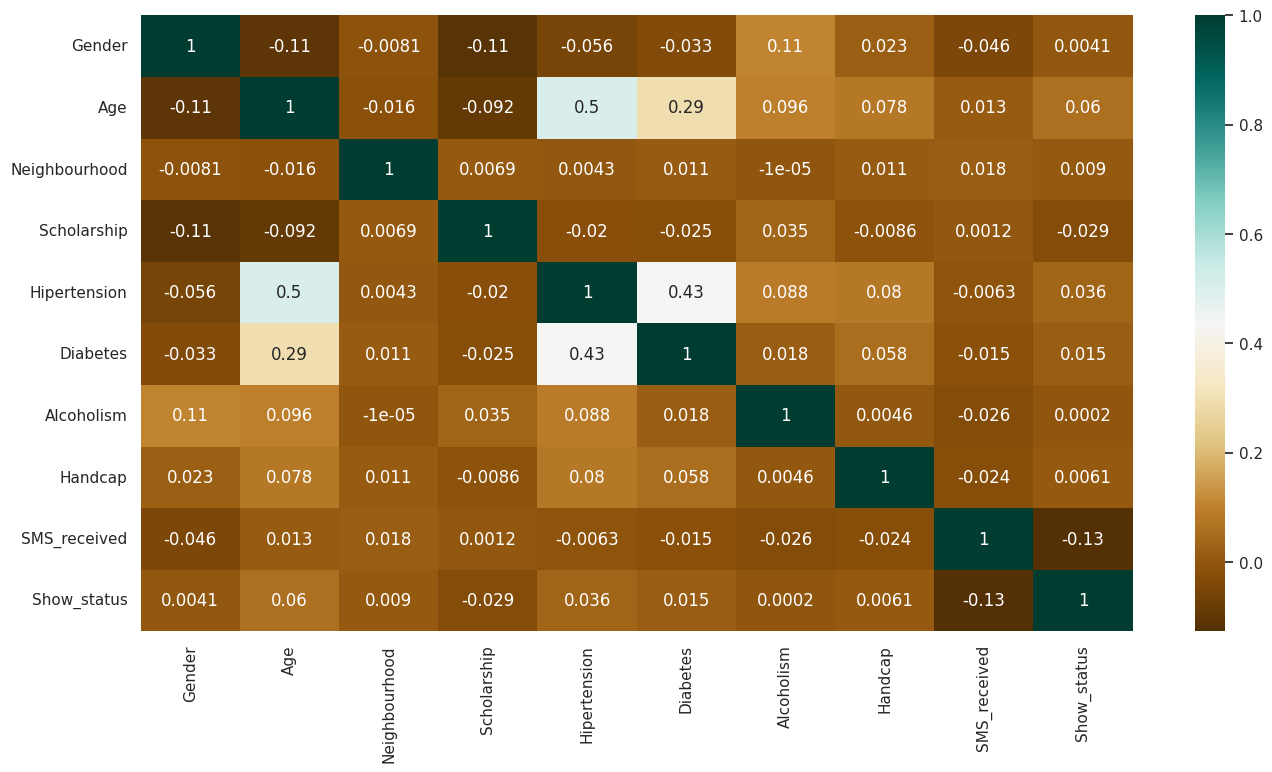

                 Gender       Age  Neighbourhood  Scholarship  Hipertension  \
Gender         1.000000 -0.106440      -0.008058    -0.114293     -0.055718   
Age           -0.106440  1.000000      -0.016358    -0.092457      0.504586   
Neighbourhood -0.008058 -0.016358       1.000000     0.006866      0.004323   
Scholarship   -0.114293 -0.092457       0.006866     1.000000     -0.019729   
Hipertension  -0.055718  0.504586       0.004323    -0.019729      1.000000   
Diabetes      -0.032554  0.292391       0.011347    -0.024894      0.433086   
Alcoholism     0.106167  0.095811      -0.000010     0.035022      0.087971   
Handcap        0.022814  0.078033       0.010990    -0.008586      0.080083   
SMS_received  -0.046298  0.012643       0.018269     0.001194     -0.006267   
Show_status    0.004119  0.060319       0.008962    -0.029135      0.035701   

               Diabetes  Alcoholism   Handcap  SMS_received  Show_status  
Gender        -0.032554    0.106167  0.022814     -0.04

In [286]:
plt.figure(figsize=(16,8))
c = df.corr()  # Calculate correlation on numerical columns
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()
print(c)

# Model Training
## Methode 1: Logistic Regression

### Prepare Data

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Gender         110527 non-null  int64
 1   Age            110527 non-null  int64
 2   Neighbourhood  110527 non-null  int64
 3   Scholarship    110527 non-null  int64
 4   Hipertension   110527 non-null  int64
 5   Diabetes       110527 non-null  int64
 6   Alcoholism     110527 non-null  int64
 7   Handcap        110527 non-null  int64
 8   SMS_received   110527 non-null  int64
 9   Show_status    110527 non-null  int64
dtypes: int64(10)
memory usage: 8.4 MB


In [289]:

X = df.drop(columns=['Show_status'])  # Drop datetime columns
y = df['Show_status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train Models and Metrics Report

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4437
           1       0.80      1.00      0.89     17669

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.27      0.21      0.24      4437
           1       0.81      0.86      0.83     17669

    accuracy                           0.73     22106
   macro avg       0.54      0.53      0.53     22106
weighted avg       0.70      0.73      0.71     22106

Model: Random Forest
              precision    recall  f1-score   support

           0       0.29      0.14      0.19      4437
           1       0.81      0.92      0.86     17669

    accuracy                           0.76     22106
   macro avg       0.55      0.53      0.52     22106
weigh

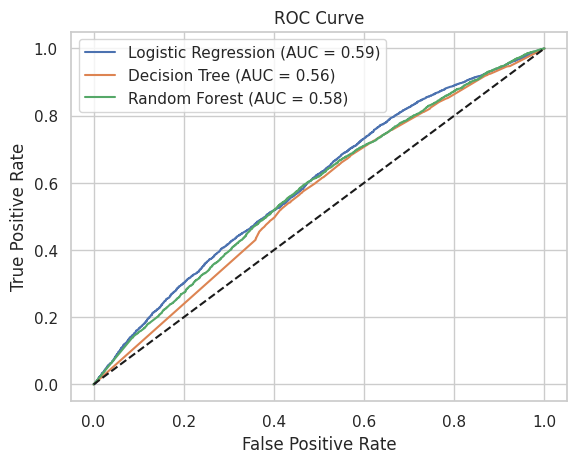

Logistic Regression: 0.89
Decision Tree: 0.83
Random Forest: 0.86


In [290]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {}

for model_name, model in models.items():
    # 10-Fold Cross-Validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')
    results[model_name] = cv_scores.mean()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Classification Report
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plotting ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print average CV scores
for model_name, score in results.items():
    print(f'{model_name}: {score:.2f}')